Abrimos el DataFrame

In [110]:
import pandas as pd

df = pd.read_csv('./Data/chess.csv')

Observamos un registro estándar del mismo

In [111]:
df.iloc[0]

game_id                  2d39c0ad-11c1-45f9-b708-081a6cfd91a1
game_order                                                  1
event                                              tournament
site                             https://lichess.org/RwcXFF0S
date_played                                        2020.02.01
round                                                       -
white                                                DoIhave2
black                                                   unclJ
result                                                    0-1
white_elo                                                1696
white_rating_diff                                       -10.0
black_elo                                                1696
black_rating_diff                                         7.0
white_title                                               NaN
black_title                                               NaN
winner                                                  unclJ
winner_e

A continuación realizaremos un histograma de frecuencias para ver la distribución de elo de los jugadores que jugaron blancas.

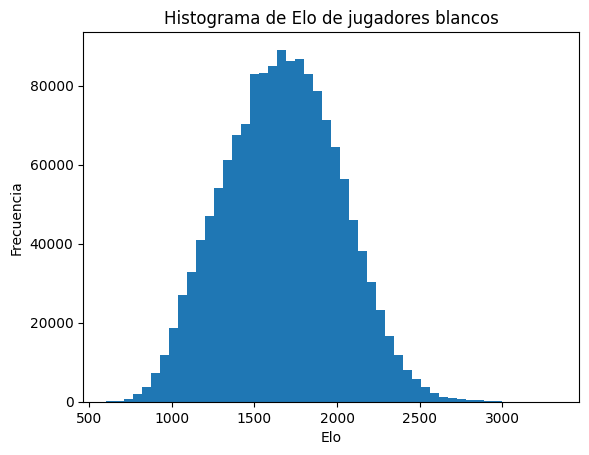

In [112]:
import matplotlib.pyplot as plt
plt.hist(df['white_elo'], bins=50)
plt.xlabel('Elo') 
plt.ylabel('Frecuencia')
plt.title('Histograma de Elo de jugadores blancos')
plt.show()

Podemos ver que la distribución es normal leptocúrtica y con una leve asimetría positiva.

A continuación veremos cómo funciona el algoritmo de match-making a partir de la correlación entre los elos de jugadores en blancas y negras.

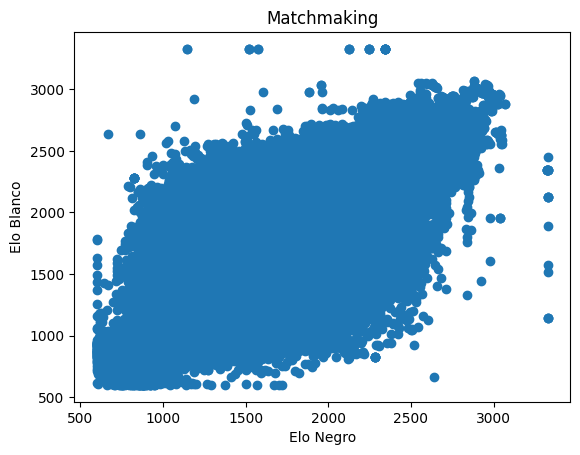

In [113]:
import matplotlib.pyplot as plt

elo_blanco = df['white_elo']
plt.scatter(elo_blanco, df['black_elo'])
plt.title("Matchmaking")
plt.xlabel("Elo Negro")
plt.ylabel("Elo Blanco")
plt.show()

In [114]:
from sklearn import linear_model
import numpy as np

#Paso 1: Instanciar/Crear el modelo
regr = linear_model.LinearRegression()
elo_negro = df[["black_elo"]]
#Paso 2: Entrenar el modelo
regr.fit(elo_negro, elo_blanco)

beta_1 = regr.coef_
beta_1 = beta_1[0]
beta_0 = regr.intercept_

In [115]:
un_elo = df.loc[df['game_id'] == "2d39c0ad-11c1-45f9-b708-081a6cfd91a1", 'white_elo']
un_elo = un_elo.values[0]

In [116]:
y = beta_0 + beta_1 * un_elo

In [117]:
y_pred = regr.predict(elo_negro)

In [118]:
from sklearn.metrics import r2_score
r2 = r2_score(elo_blanco, y_pred)
r2

0.8546946254066511

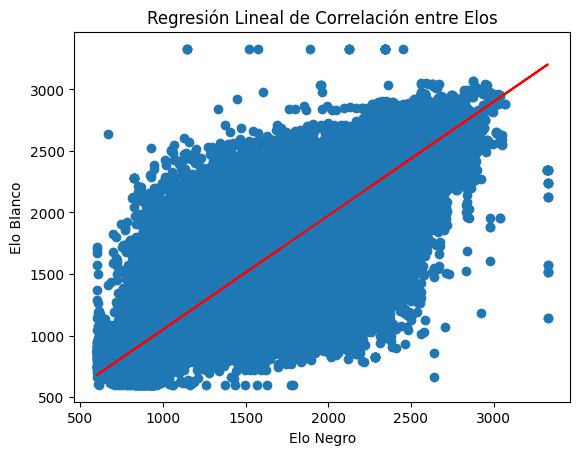

In [119]:
plt.scatter(elo_negro, elo_blanco)
plt.plot(elo_negro, y_pred, 'r')
plt.xlabel('Elo Negro')
plt.ylabel('Elo Blanco')
plt.title("Regresión Lineal de Correlación entre Elos")
plt.show()

In [120]:
elo_negro.insert(1, "elo_value_pred", y_pred)
elo_negro

,black_elo,elo_value_pred
0,1696,1693.991422
1,1630,1632.984467
2,2080,2048.940983
3,2096,2063.730548
4,1722,1718.024466
...,...,...
1502865,1677,1676.428814
1502866,1079,1123.668822
1502867,1263,1293.748819
1502868,1130,1170.810560
